#  Classifying Personal Income

### Problem Statement
- "Subsidy Inc. delivers subsidies to individuals based on their income.
- Accurate income data is one of the hardest" piece of data to obatain across world.
- Subsidy Inc. has obtained a large data set of authenticated data on individual income, demographic parameters, and a gew financial parameters.
- Subsidy Inc. wishes us to:
    Develop an income classifier system for individuals.

### Objective : 
- Simplify the data system by reducing the number of variables to be studied, without sacrificing too much of accuracy. Such a system would help Subsidy Inc. in planning subsidy outlay, monitoring and preventing missue.

In [2]:
# Importing essential packages
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [4]:
# Storing the data file in 'income_data'
income_data = pd.read_csv('income.csv')

## Skimming
- Skimming in data analysis refers to a quick, superficial review of a dataset or information to get a general sense of its content without delving into a detailed analysis. It's often used as a preliminary step to identify patterns, trends, outliers, or potential areas of interest that warrant further investigation.

In [5]:
income_data.head(50)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,"less than or equal to 50,000"
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
8,17,?,11th,Never-married,?,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,"less than or equal to 50,000"


In [8]:
# As we skim through our dataset, we saw some special characters in JobType and occupation. So, let's check that out -
print(income_data['JobType'].unique(),'\n')
print(income_data['occupation'].unique())

[' Private' ' Federal-gov' ' ?' ' Self-emp-inc' ' Self-emp-not-inc'
 ' Local-gov' ' State-gov' ' Without-pay' ' Never-worked'] 

[' Adm-clerical' ' Armed-Forces' ' Prof-specialty' ' Craft-repair'
 ' Sales' ' Exec-managerial' ' Machine-op-inspct' ' ?' ' Transport-moving'
 ' Farming-fishing' ' Tech-support' ' Other-service' ' Handlers-cleaners'
 ' Protective-serv' ' Priv-house-serv']


In [11]:
# We must replace the special character ' ?' with NaN values.
income_data = pd.read_csv('income.csv', na_values = ' ?')

In [13]:
print(income_data['JobType'].unique(),'\n')
print(income_data['occupation'].unique())

[' Private' ' Federal-gov' nan ' Self-emp-inc' ' Self-emp-not-inc'
 ' Local-gov' ' State-gov' ' Without-pay' ' Never-worked'] 

[' Adm-clerical' ' Armed-Forces' ' Prof-specialty' ' Craft-repair'
 ' Sales' ' Exec-managerial' ' Machine-op-inspct' nan ' Transport-moving'
 ' Farming-fishing' ' Tech-support' ' Other-service' ' Handlers-cleaners'
 ' Protective-serv' ' Priv-house-serv']


In [15]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        30169 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


# Process or Data Analytics framework
- **Problem Statement** - Define the specific business problem or objective you're aiming to address with data analytics.
- **Problem Conceptualization** -Break down the problem into smaller, manageable components. Identify the key variables,  metrics, and data sources relevant to the problem. Determine the success criteria or KPIs that will indicate the solution's effectiveness.
- **Solution conceptulization** - Consider different data analysis techniques, such as descriptive, diagnostic, predictive, or prescriptive analytics.
- **Method Identification** - Choose the appropriate methods and techniques for data collection, preparation, and analysis based on the problem and available data.
- **Realization of solution** - Develop a clear and actionable plan based on the insights gained from the analysis. Implement and monitor the recommended solution, tracking key metrics and KPIs to assess its impact.

## Framework for our problem
- Problem conceptualization
    - Develop an income classifier for individuals with reduced no. of variables
- Problem characterzation - Classification (binary)

**Apriori Known**
- Dependent variables 
- Independent variables
- Categorical - 9
- Numerical - 4

## Solution conceptualization
- Identify if data is clean.
- Look for missing values.
- Identify variables influencing salary status and look for possible relationships between variables.
    - Correlation, chi-square test, boc plots, scatter plots etc.
- Identify if categories can be combined.
- Build a model with reduced number of variables to classify the individual's salary status to plan subsidy outlay monitor and prevent misuse.

## Method identification
- Logistic Regression
- Random Forest
- K nearest neighbors

## Realization of solution
- Evaluate performance metrics
- If assumptions are satisfied and solutions are acceptabel then model is good.

## Exploratory data analysis

1. Getting to know the data
2. Data preprocessing (Missing Values)
3. Cross tables and data visualization

In [16]:
# Creating a copy of dataset to avoid any kind of data lost in original dataset.
data = income_data.copy(deep = True)

In [18]:
# While looking in the information of dataset we get to know the variables which have Null values.
# And if the datatypes of the varibles is according to the analysis.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        30169 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [19]:
# Discriptive Statistics for Numerical Variables.
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


# Explain

In [21]:
# Discriptive statistics for the Categorical Variables.
data.describe(include = 'object')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,30169,31978,31978,30162,31978,31978,31978,31978,31978
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


# Explain

In [14]:
data['JobType'].unique()

array([' Private', ' Federal-gov', nan, ' Self-emp-inc',
       ' Self-emp-not-inc', ' Local-gov', ' State-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [15]:
data['occupation'].unique()

array([' Adm-clerical', ' Armed-Forces', ' Prof-specialty',
       ' Craft-repair', ' Sales', ' Exec-managerial',
       ' Machine-op-inspct', nan, ' Transport-moving', ' Farming-fishing',
       ' Tech-support', ' Other-service', ' Handlers-cleaners',
       ' Protective-serv', ' Priv-house-serv'], dtype=object)

# Pre-processing
- Data preprocessing is a crucial step in data analysis and machine learning that involves cleaning, transforming, and organizing raw data into a format suitable for analysis or modeling.
    - Data Cleaning: 
        - Handling Missing Values: Decide how to handle missing data (e.g., impute with mean/median, forward-fill, backward-fill, drop rows/columns).
        - Outlier Detection and Treatment: Identify and address outliers that can skew analysis results.
    - 

In [16]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [17]:
## Subset the dataframe to identify if a row has more than 1 column missing.
missing = data[data.isnull().any(axis = 1)]

In [18]:
missing.head(40)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
57,72,NaN,HS-grad,Married-civ-spouse,NaN,Husband,White,Male,0,0,20,United-States,"less than or equal to 50,000"
69,53,NaN,5th-6th,Widowed,NaN,Unmarried,Black,Female,0,0,30,United-States,"less than or equal to 50,000"
73,57,NaN,Assoc-voc,Widowed,NaN,Unmarried,White,Female,0,0,38,United-States,"less than or equal to 50,000"
75,20,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,24,United-States,"less than or equal to 50,000"
76,21,NaN,Some-college,Never-married,NaN,Unmarried,White,Female,0,0,35,United-States,"less than or equal to 50,000"


In [19]:
missing['JobType'].sort_values()

4825      Never-worked
10215     Never-worked
14073     Never-worked
19542     Never-worked
22385     Never-worked
             ...      
31892              NaN
31934              NaN
31945              NaN
31967              NaN
31968              NaN
Name: JobType, Length: 1816, dtype: object

**Points to note**
1. Missing values in JobType     = 1809
2. Missing values in Occupation  = 1819
3. There are 1809 rows where two specific columns i.e. occupation and JobType have missing values
4. (1816 - 1809 = 7) => You still have occupation unfilled for these 7 rows. Because, jobtype is Never worked

In [50]:
data2 = data.dropna(axis = 0)

In [51]:
data2.shape

(30162, 13)

C:\Users\acer\AppData\Local\Temp\ipykernel_1572\1811176373.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2.corr(), annot = True, cmap = 'hot')


<AxesSubplot: >

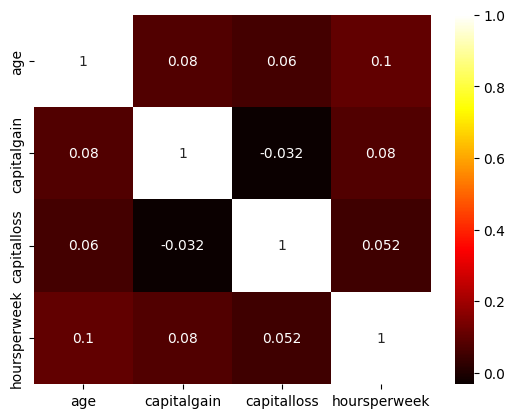

In [22]:
# Relationshop between independent variables
sns.heatmap(data2.corr(), annot = True, cmap = 'hot')

In [23]:
# Cross tables & data visulization
# ================================
# Extracting the column names
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [24]:
# Gender proportion table:
pd.crosstab(index = data2['gender'],
            columns = 'count',
           normalize = False,
           margins = True)

col_0,count,All
gender,,
Female,9782,9782
Male,20380,20380
All,30162,30162


In [25]:
pd.crosstab(index = data2['gender'],
           columns = 'count',
           normalize = True,
           margins = True)

col_0,count,All
gender,,
Female,0.324315,0.324315
Male,0.675685,0.675685
All,1.000000,1.000000


In [26]:
# Gender vs Salary Status
pd.crosstab(index = data2['gender'],
           columns = data2['SalStat'],
           normalize = 'index',
           margins = True)

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


In [27]:
pd.crosstab(index = data2['gender'],
           columns = data2['SalStat'],
           normalize = False,
           margins = True)

SalStat,"greater than 50,000","less than or equal to 50,000",All
gender,,,
Female,1112,8670,9782
Male,6396,13984,20380
All,7508,22654,30162


<AxesSubplot: xlabel='SalStat', ylabel='count'>

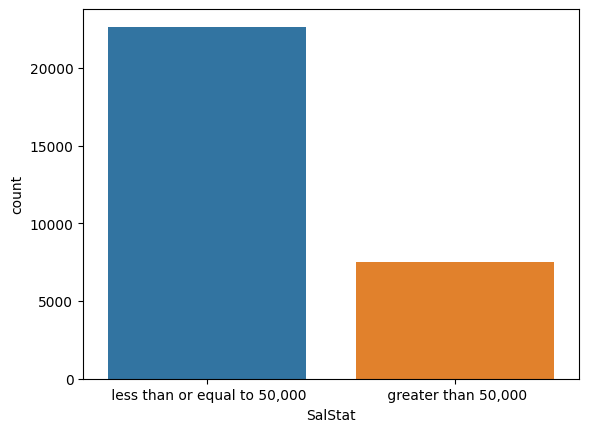

In [28]:
# In classification problem you need to know how balance the class values are.
# Ex-
### Frequency distribution of Salaray status
sns.countplot(x = 'SalStat', data = data2)

#### 75% of people's salary status is <=50,000
#### 25% of people's salary status is > 50,000

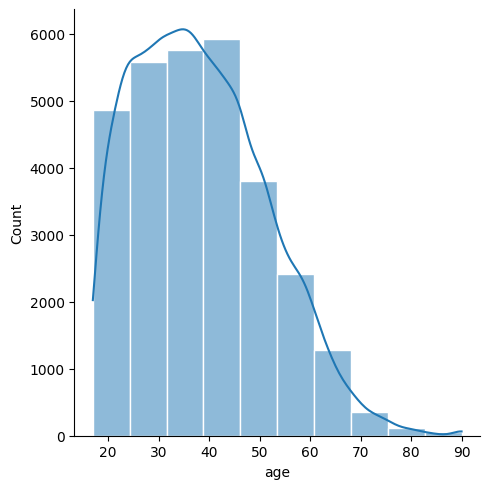

In [29]:
## Histogram of age
sns.displot(data2['age'],
            bins = 10,
            kde = True,
            edgecolor = 'white')

## people with age 20-45 are high in frequency

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

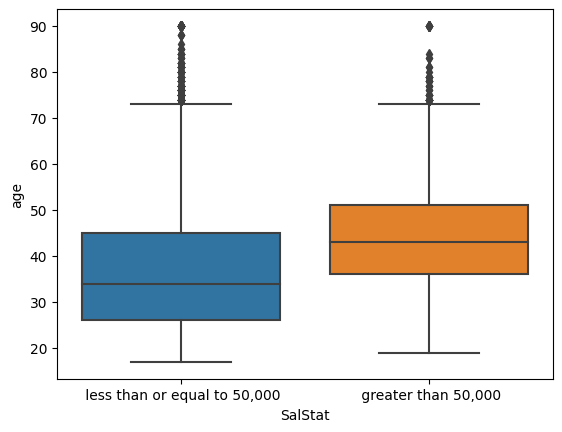

In [30]:
### Box plot - Age vs Salary status
sns.boxplot(x = 'SalStat',y = 'age',data = data2)
data2.groupby('SalStat')['age'].median()

<AxesSubplot: xlabel='count', ylabel='JobType'>

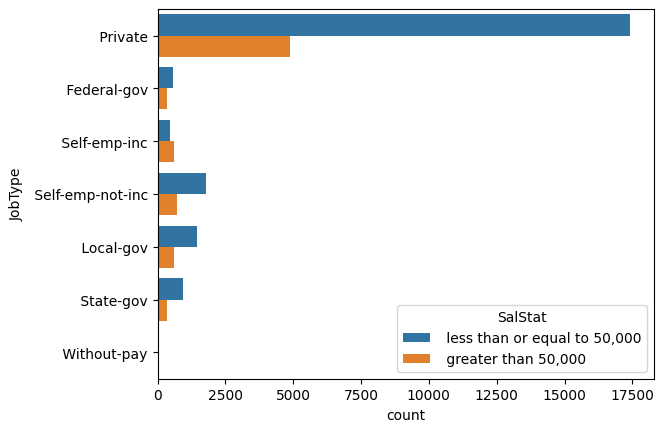

In [31]:
sns.countplot(y ='JobType',
              data = data2 ,
              hue = data2['SalStat'])

In [32]:
data2['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: JobType, dtype: int64

- From the above table it is visible that 56% of self employed people earn more than 50000 USD per year.
- Hence an important variable in avoiding the misuse of subsidies.

<AxesSubplot: xlabel='count', ylabel='EdType'>

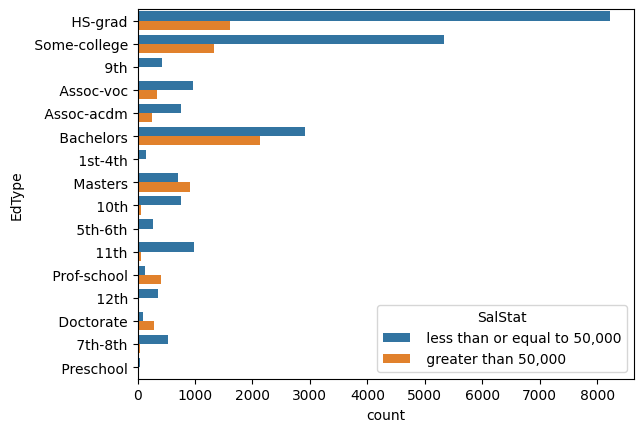

In [33]:
### Education vs Salary Status
sns.countplot(y = 'EdType',
              data =  data2,
              hue = data2['SalStat'])

In [34]:
100*pd.crosstab(index = data2['EdType'],
            columns = data2['SalStat'],
            normalize = 'index').round(3)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


**From the above table we can see that people who have done Doctorate, Masters, Prof-school are more likely to earn above 50000 USD per year when compared with others. Hence, an influence variable in avoiding the misuse of subsidies**

<AxesSubplot: xlabel='count', ylabel='occupation'>

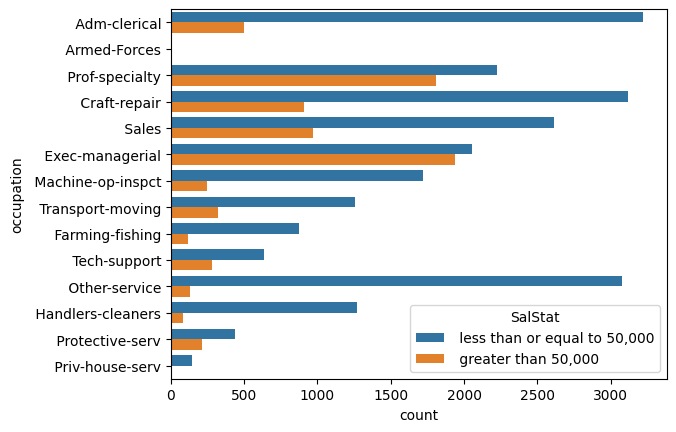

In [35]:
## Occupation vs Salary Status
sns.countplot(y = data2['occupation'],
              hue = data2['SalStat'])

In [36]:
100*pd.crosstab(index = data2['occupation'],
                columns = data2['SalStat'],
                normalize = 'index').round(3)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


**Those who make more than 50000 USD per year are more likely to work as managers and professionals, hence an important variable is avoiding the misuse of subsidies.**

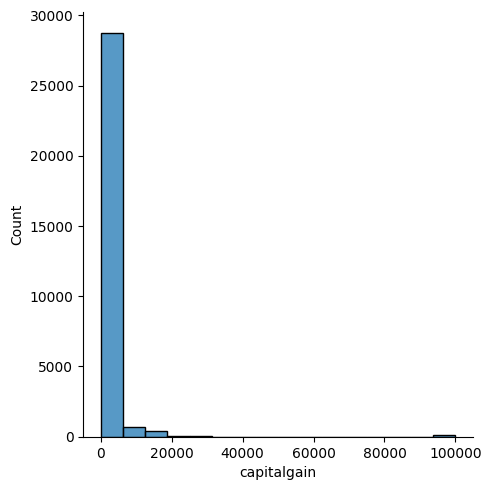

In [37]:
## Frequency distribution of Capital Gain
sns.displot(data2['capitalgain'])

#### 92%(27611 approx.) of the capital gain is 0

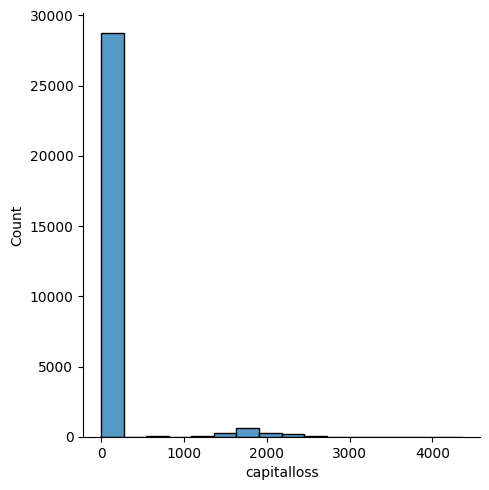

In [38]:
sns.displot(data2['capitalloss'])


#### 95%(28721 approx.) of the capital loss is 0

In [39]:
pd.value_counts(data2['capitalgain'] == 0)

True     27624
False     2538
Name: capitalgain, dtype: int64

In [40]:
pd.value_counts(data2['capitalloss'] == 0)

True     28735
False     1427
Name: capitalloss, dtype: int64

<AxesSubplot: xlabel='SalStat', ylabel='hoursperweek'>

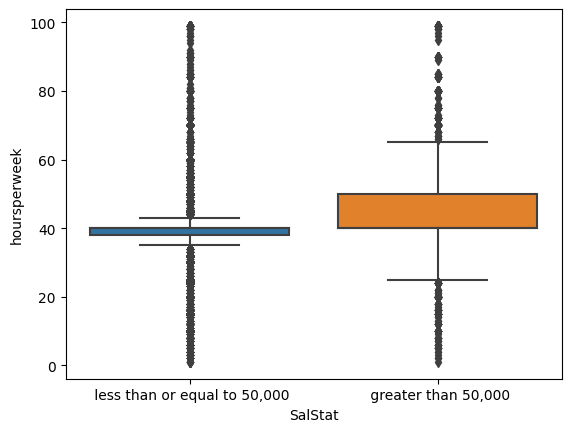

In [41]:
## Boxplot for Hours per week(hpw) vs Salary status

sns.boxplot(y = 'hoursperweek',x = 'SalStat', data = data2)

- From the plot it is clearly visible that those who make more than 50000 USD per year are more likely to spend 40-50 hours per week.
- This variable can contribute in classifying the individual's salary status since there is association between salary status and hours per week.

In [42]:
data2['maritalstatus'].unique()

array([' Divorced', ' Never-married', ' Married-civ-spouse', ' Widowed',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse'],
      dtype=object)

<AxesSubplot: xlabel='count', ylabel='maritalstatus'>

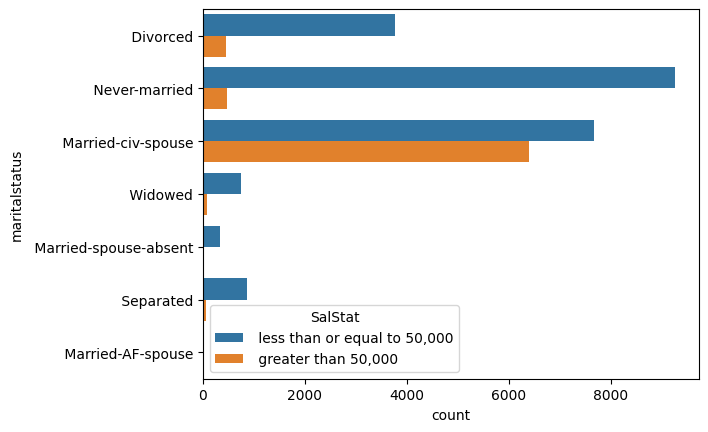

In [43]:
sns.countplot(y = data2['maritalstatus'],
              hue = data2['SalStat'])

# Logistic Regression

In [97]:
# reindexing the salary status name to 0,1  (**Interger encoding**)
data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

C:\Users\acer\AppData\Local\Temp\ipykernel_1572\1510468781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [98]:
data2['SalStat'].unique()

array([0, 1], dtype=int64)

=========================================================

In [90]:
data3 = data2.copy(deep = True)

In [93]:
data3['SalStat'] = data['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

In [96]:
data3['SalStat'].unique()

array([0, 1], dtype=int64)

=============================================================

In [99]:
# One hot encoding
new_data = pd.get_dummies(data2, drop_first = True)

In [100]:
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Dividing variables/columns on the basis of dependent variables and independent variables

In [102]:
#storing the columns names
column_list = list(new_data.columns)
print(column_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [105]:
# separating the input names from data
features = list(set(column_list)-set(['SatStat']))
features

['JobType_ Self-emp-inc',
 'nativecountry_ Holand-Netherlands',
 'JobType_ Private',
 'EdType_ 11th',
 'EdType_ Assoc-acdm',
 'nativecountry_ United-States',
 'occupation_ Protective-serv',
 'gender_ Male',
 'occupation_ Transport-moving',
 'nativecountry_ Italy',
 'nativecountry_ Guatemala',
 'occupation_ Handlers-cleaners',
 'nativecountry_ India',
 'age',
 'nativecountry_ England',
 'nativecountry_ Jamaica',
 'occupation_ Farming-fishing',
 'nativecountry_ Germany',
 'nativecountry_ South',
 'relationship_ Wife',
 'maritalstatus_ Separated',
 'nativecountry_ Mexico',
 'EdType_ 5th-6th',
 'occupation_ Prof-specialty',
 'nativecountry_ Canada',
 'maritalstatus_ Married-AF-spouse',
 'nativecountry_ Laos',
 'hoursperweek',
 'nativecountry_ Columbia',
 'nativecountry_ Dominican-Republic',
 'EdType_ Preschool',
 'nativecountry_ Outlying-US(Guam-USVI-etc)',
 'nativecountry_ Iran',
 'nativecountry_ Puerto-Rico',
 'race_ Other',
 'nativecountry_ Portugal',
 'EdType_ Assoc-voc',
 'EdType_ 9th

In [106]:
#storing the output values in y
y = new_data['SalStat'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [114]:
#storing the values from input fratures
x = new_data[features].values
x

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [115]:
#storing the values from inpyt features
train_x,test_x , train_y,test_y   =   train_test_split(x,y,test_size = 0.3, random_state = 0)

In [118]:
# Make an instance of the Model
logistic = LogisticRegression()
  

In [123]:
# Model Fitting - fitting the values for x and y
logistic.fit(train_x,train_y)

C:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
logistic.coef_

array([[ 9.21117954e-02, -1.51567080e-03, -4.51230353e-01,
        -4.56375008e-01, -1.54247991e-01, -9.67535712e-01,
        -4.11310160e-02, -3.75405091e-01, -1.37413517e-01,
        -2.94656536e-04, -2.95325932e-02, -5.27451349e-01,
        -7.33079739e-02, -2.88926449e-02,  1.40816390e-02,
        -2.78310809e-02, -5.20516664e-01,  8.25235060e-03,
        -6.89887628e-02,  1.50219983e-01, -1.86439363e-01,
        -3.73614926e-01, -1.90365508e-01,  7.50367168e-01,
        -2.15408153e-02,  3.56405533e-02, -1.23924689e-02,
        -1.47363353e-02, -3.57706388e-02, -3.74138522e-02,
        -4.48251696e-02, -1.21869542e-02, -1.73099534e-02,
        -6.19998115e-02, -1.39049143e-01, -1.81363576e-02,
        -1.39776492e-01, -2.24935803e-01, -7.35361028e-03,
         3.87046789e-01, -9.54945753e-03,  1.10616280e-04,
        -1.01690924e-02,  3.70886287e-01, -1.49047627e-02,
        -3.16426809e-02, -1.67597306e-02, -2.74339451e-02,
        -6.96623202e-03, -5.87978547e-01, -1.39470107e-0

In [125]:
logistic.intercept_

array([-2.17929615])

In [126]:
# Prediction from test data
prediction = logistic.predict(test_x)

In [127]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [156]:
# Confusion Matrix
c_matrix = confusion_matrix(test_y, prediction)

In [158]:
c_matrix

array([[6630,  193],
       [ 394, 1832]], dtype=int64)

In [130]:
#6823+2226 == 6332+491+925+1301

True

In [139]:
# Calculating the accuracy
accuracy_score(test_y, prediction)

1.0

In [140]:
# getting misclassified values from prediction
(test_y != prediction).sum()

0

### KNN Model

In [153]:
# KNN (K-Nearest Neighbour) model
from sklearn.neighbors import KNeighborsClassifier

In [144]:
# Storing the K nearest neighbors classifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

In [145]:
# fitting the values for X and Y
KNN_classifier.fit(train_x, train_y)

KNeighborsClassifier()

In [146]:
# Predictiong the test values with model
prediction = KNN_classifier.predict(test_x)

In [163]:
# Performance metric check
con_matrix = confusion_matrix(test_y, prediction)
con_matrix

array([[6630,  193],
       [ 394, 1832]], dtype=int64)

In [180]:
# Calculating the accuracy
accuracy_score(test_y, prediction).round(3)*100

93.5

In [170]:
# Misclassified samples 
(test_y != prediction).sum()

587

In [177]:
# Effect of K values on classifier
#      -by iterating through different K values, 
#       we can get the K value with least misclassified values and most accuracy

Misclassified_sample = []
# Calculating error for K values between 1 and 20
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_x,train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != prediction).sum())